# Project: Statistics - The Science of Decisions 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#questions">Questions for investigation</a></li>
<li><a href="#answers">Answers:</a>
    <a href="#1">1.Variable</a>
    <a href="#2">2.Hypotheses</a>
    <a href="#3">3.Descriptive Statistics</a>
    <a href="#4">4.Visualisation</a>
    <a href="#5">5.Statistical Test</a>
    <a href="#6">6.optional</a>
    </li>
</ul>

<a id='intro'></a>
## Introduction  

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.  
I personally ran the test on this [site.](https://www.google.com/url?q=https://faculty.washington.edu/chudler/java/ready.html&sa=D&ust=1523886425750000)  
I then added my times (8.909s and 18.69 sec) to the [data set](https://docs.google.com/spreadsheets/d/1IcbjZhRuCyC0QYwLx7GpNXXwwwu8jnprIDXKUOoCDis/edit#gid=691290919) provided by Udacity.  

<a id='questions'></a>
## Questions for investigation
1. What is our independent variable? What is our dependent variable?
2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.
3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.
4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.
5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?
6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats
%matplotlib inline

<a id='answers'></a>
## Answers
<a id='1'></a>
### 1. Variable
Our independent variable is the state of our condition:**congruent or incongruent**.  
Our dependent variable is the **answering time.**  
For more convenience, I'll index  all our variables related to the congruent and incongruent condition **_c** and **_i** respectively.  
The variables related to the difference of those variables will be indexed **_d**.

<a id='2'></a>
### 2. Hypotheses
Having performed the test myself, I can tell that it took me longer to answer when the word meaning and the color are incongruent. So I'll define the following hypotheses:  

   - Our null hypothesis, noted $H_0$, is that the average answering time having the congruent condition true, noted $\mu_c$, is equal to the average answering time having the incongruent condition true, noted $\mu_i$.
   - Our alternative hypothesis, noted $H_a$, is that it takes longer to answer when the word meaning and font color are incongruent.  
   So, with $\mu_d=\mu_c-\mu_i$:  
   $$H_0: \mu_d \geq 0$$
   $$H_a: \mu_d < 0$$

    
The test consist in a same group of people performing 2 different tests. So we have 2 dependent samples. And we only have samples, not a full population. So we can't do a z-test but a t-test.  
So we will perform the following test:  
- 2 dependent samples
- t-test
- one-tailed (negative)
- alpha level: .01 (As the difference between my 2 times is quite high, I want to choose a quite significant alpha level)
- degree of freedom: 24=25-1 (because we have 2 **dependent** samples of size 25)

We should also keep mind that to perform this test we perform an assumption of normality: we assume that the sampling distribution of the mean of our population is normal. Here we deal especially with samples with a size smaller than 30, so this assumption is quite "strong".  
We also assume that the individuals who performed the test were randomly selected.

<a id='3'></a>
### 3.Descriptive Statistics

In [2]:
#import csv file containng samples data in s dataframe
file='stroopdata.csv'
with open(file,'r') as f:
    df=pd.read_csv(f)

# add my recorded times to the dataframe
mytimes=pd.DataFrame({'Congruent':[8.909],'Incongruent':[18.690]}) 
df=df.append(mytimes)
df.describe()

,Congruent,Incongruent
count,25.000000,25.000000
mean,13.845440,21.882880
std,3.633017,4.742932
min,8.630000,15.687000
25%,11.344000,18.690000
50%,14.233000,20.878000
75%,16.004000,23.894000
max,22.328000,35.255000


Comparing the two means, we note for instance that the answering time increased by more than 50%.
<a id='4'></a>
### 4.Visualisation

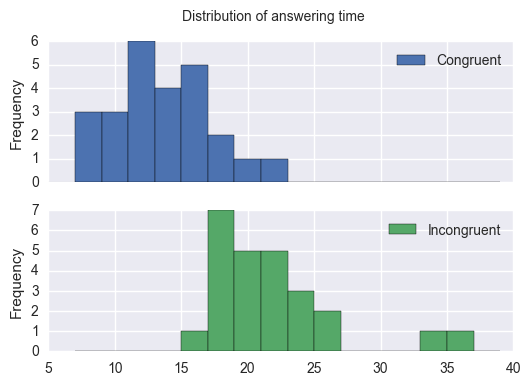

In [3]:
df.plot(title='Distribution of answering time',kind='hist', subplots='True', bins=range(5,40,2))
plt.show()

On the 2 previous histograms, we can clearly see that the distribution of times to answer when word meaning and color font are congruent is centered between 10 and 15 seconds. The distribution of times when the condition is incongruent is comnpletely shifted to the right: min, max, mean are higher.

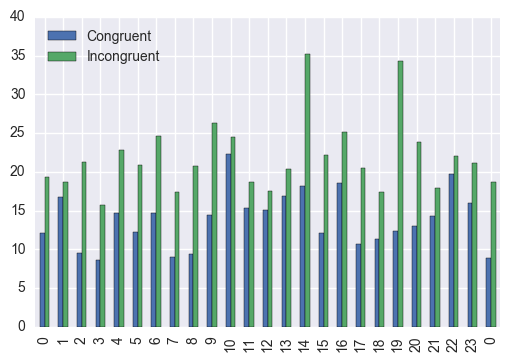

In [4]:
df.plot(kind='bar')
plt.show()

<a id='5'></a>
### 5. Statistical Test

In [11]:
df['Difference']=df['Congruent']-df['Incongruent']

mu_d=df['Difference'].mean()

#standard deviation
sd_d=np.std(df['Difference'],ddof=1)
se=sd_d/np.sqrt(df.shape[0])

#t-statistic
t_stat=mu_d/(sd_d/np.sqrt(df.shape[0]))
t_crit=scipy.stats.t.ppf(0.01,df.shape[0]-1)

#Confidence level
CI=[mu_d+t_crit*se,mu_d-t_crit*se]

print "Standard Error="+str(se)
print 't_stat='+str(t_stat)
print 't_crit='+str(t_crit)
print "Confidence Interval="+str(CI)

Standard Error=0.95524613596
t_stat=-8.41399896574
t_crit=-2.49215947316
Confidence Interval=[-10.418065706930086, -5.6568142930699103]



As t_stat < t_crit we can already say that our 2 samples are significantly different at p<.01. We reject the null.  
Confidence interval on mean difference;99% CI;(-8.04,8.04).  
It confirms my expectation, or at least my personal experience:  
One is confused because one is submitted at the same time two contradictory pieces of information: color and word's meaning. It takes more time to give only the font color's name because one has to first "reject" the word's meaning information.

<a id='6'></a>
### 6.Optional
Some theories listed by [wikipedia](https://en.wikipedia.org/wiki/Stroop_effect#Theories) includes the "Automaticity theory:  
*" It suggests that since recognizing colors is not an "automatic process" there is hesitancy to respond; whereas, the brain automatically understands the meaning of words as a result of habitual reading."*  
I would say that the explaination I provided in 4. falls in this theory.  
An interesting alternative task leading to similar effect is the [Simon effect](https://en.wikipedia.org/wiki/Simon_effect). 
